<a href="https://colab.research.google.com/github/antonvandike/Algoritmos-Geneticos/blob/main/Libro_Eyal_Wirsansky/Handson_chapter_6_4_simionescu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Solucion del problema de la funcion de Simionescu

###Configuraciones y definiciones

In [ ]:
pip install deap

#Solucion del problema del agente de ventas viajero

###Configuraciones y definiciones

In [ ]:
## Paso 1: Modulos

from deap import base
from deap import creator
from deap import tools

import random as rd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import elitism
import math

In [ ]:
# Constantes del problema:

DIMENSIONS = 2  # number of dimensions
BOUND_LOW, BOUND_UP = -1.25, 1.25  # boundaries for all dimensions

In [ ]:
# Valor de penalidad para las restricciones

PENALTY_VALUE = 10.0

In [ ]:
## Paso 2: Parametros del problema

# Contenido del problema del agente viajero

POPULATION_SIZE = 300     # Tamaño de la poblacion de individuos
P_CROSSOVER     =  0.9    # Probabilidad de cruza
P_MUTATION      =  0.5    # Probabilidad de mutación

MAX_GENERATIONS = 300     # Maximo numero de generaciones (condición de termino)

In [ ]:
HALL_OF_FAME_SIZE = 30

In [ ]:
CROWDING_FACTOR = 20.0  # Factor de aglomeracion para cruza y mutacion

In [ ]:
## Paso 3: Elementos aleatorios

RANDOM_SEED = 42          # Comunmente cuando se experimenta con un codigo
rd.seed(RANDOM_SEED)      # se corre el problema con los mismos parametros
                          # para repetir y compara resultados

In [ ]:
## Paso 4: Declarando el cromosoma
toolbox = base.Toolbox()

def randomFloat(low, up):
    return [rd.uniform(l, u) for l, u in zip([low] * DIMENSIONS, [up] * DIMENSIONS)]

toolbox.register("attrFloat", randomFloat, BOUND_LOW, BOUND_UP)

In [ ]:
toolbox.attrFloat()

[0.3485669961447093, -1.1874731119433326]

In [ ]:
## Paso 5: Crear la funcion de aptitud (FITNESS)

# Se indica maximizacion y un solo peso
creator.create('FitnessMin', base.Fitness, weights = (-1.0,))

In [ ]:
## Paso 6: Crear la funcion de  aptitud del individuo

creator.create("Individual", list, fitness=creator.FitnessMin)

In [ ]:
## Paso 7: Declarar el operador para generador de individuos

toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.attrFloat)

In [ ]:
## Paso 8: Declarar el operador para generar la poblacion

toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

In [ ]:
## Paso 9: Definir función para calcular la aptitud
# 'Inverted' Himmelblau function as the given individual's fitness:
def simionescu(individual):
    x = individual[0]
    y = individual[1]
    f = 0.1 * x * y
    return f,  # return a tuple

In [ ]:
## Paso 10: Declarar el operador de evaluacion

toolbox.register("evaluate", simionescu)

In [ ]:
# define the valid input domain using the cosntraints:
def feasible(individual):
    """Feasibility function for the individual.
    Returns True if feasible, False otherwise.
    """
    x = individual[0]
    y = individual[1]
    return x**2 + y**2 <= (1 + 0.2 * math.cos(8.0 * math.atan2(x, y)))**2


In [ ]:
# decorate the fitness function with the delta penalty function:
toolbox.decorate("evaluate", tools.DeltaPenalty(feasible, PENALTY_VALUE))

In [ ]:
## Paso 11: Declarar los operadores geneticos

toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUND_LOW, up=BOUND_UP, eta=CROWDING_FACTOR)
toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUND_LOW, up=BOUND_UP, eta=CROWDING_FACTOR, indpb=1.0/DIMENSIONS)

###Evolucionando la solución

In [ ]:
def simionescu_problem():



    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the Genetic Algorithm flow with elitism:
    population, logbook = elitism.eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    # print info for best solution found:
    best = hof.items[0]
    print("-- Best Individual = ", best)
    print("-- Best Fitness = ", best.fitness.values[0])

    # extract statistics:
    minFitnessValues, meanFitnessValues = logbook.select("min", "avg")

    # plot statistics:
    sns.set_style("whitegrid")
    plt.plot(minFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Min / Average Fitness')
    plt.title('Min and Average fitness over Generations')

    plt.show()



gen	nevals	min      	avg    
0  	300   	-0.069787	4.93296
1  	256   	-0.069787	2.55945
2  	258   	-0.069787	1.15236
3  	259   	-0.069787	1.04513
4  	257   	-0.0711389	0.838209
5  	262   	-0.0711389	1.10278 
6  	253   	-0.0713743	1.03549 
7  	259   	-0.0713743	1.33405 
8  	260   	-0.0713743	1.46187 
9  	263   	-0.0717955	1.79389 
10 	248   	-0.0717955	1.78702 
11 	257   	-0.0719372	2.28488 
12 	257   	-0.0719508	2.45065 
13 	255   	-0.0719508	2.71883 
14 	262   	-0.0719526	2.11497 
15 	252   	-0.0719526	2.18229 
16 	254   	-0.0719526	2.58346 
17 	264   	-0.0719754	2.28121 
18 	262   	-0.0719783	2.51597 
19 	254   	-0.0719823	2.4829  
20 	259   	-0.0719823	2.95255 
21 	256   	-0.0719864	2.51581 
22 	259   	-0.0719864	2.61657 
23 	260   	-0.0719879	2.68394 
24 	254   	-0.0719879	2.64972 
25 	259   	-0.071993 	2.51614 
26 	253   	-0.0719947	2.78354 
27 	257   	-0.0719947	2.98504 
28 	251   	-0.0719947	3.18753 
29 	254   	-0.0719947	2.7509  
30 	255   	-0.0719967	2.71703 
31 	261   	-0.0719

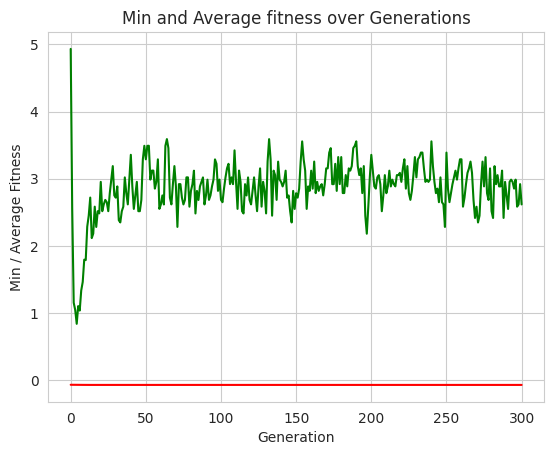

In [ ]:
simionescu_problem()